In [1]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from matplotlib import font_manager, rc # Korean font
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.style.use('ggplot') # ggplot style

In [2]:
data = pd.read_csv('data/한국가스공사_시간별 공급량_20181231.csv', encoding='cp949')
temp = pd.read_csv('data/avg_temp.csv')
holiday = pd.read_csv('data/한국가스공사_대전 도시가스 수요의 특수일 효과_20210914.csv', encoding='cp949')
humidity = pd.read_csv('data/avg_humidity.csv')
pred_2019 = pd.read_csv('data/pred_2019.csv')

# Function

In [3]:
def trans_sep(x):
    if x == 0:
        return 'A'
    elif x == 1:
        return 'B'
    elif x == 2:
        return 'C'
    elif x == 3:
        return 'D'
    elif x == 4:
        return 'E'
    elif x == 5:
        return 'G'
    else:
        return 'H'

# avg_temperature

In [4]:
data['연월일'] = pd.to_datetime(data['연월일'])

data['year'] = data['연월일'].dt.year
data['month'] = data['연월일'].dt.month
data['day'] = data['연월일'].dt.day

data['시간'] = data['시간'] - 1

In [5]:
temp['time'] = pd.to_datetime(temp['time'])

temp['year'] = temp['time'].dt.year
temp['month'] = temp['time'].dt.month
temp['day'] = temp['time'].dt.day
temp['hour'] = temp['time'].dt.hour

In [6]:
temp_month = temp.loc[:, ['temp', 'month']].groupby(by='month').mean()
temp_hour = temp.loc[:, ['temp', 'hour']].groupby(by='hour').mean()

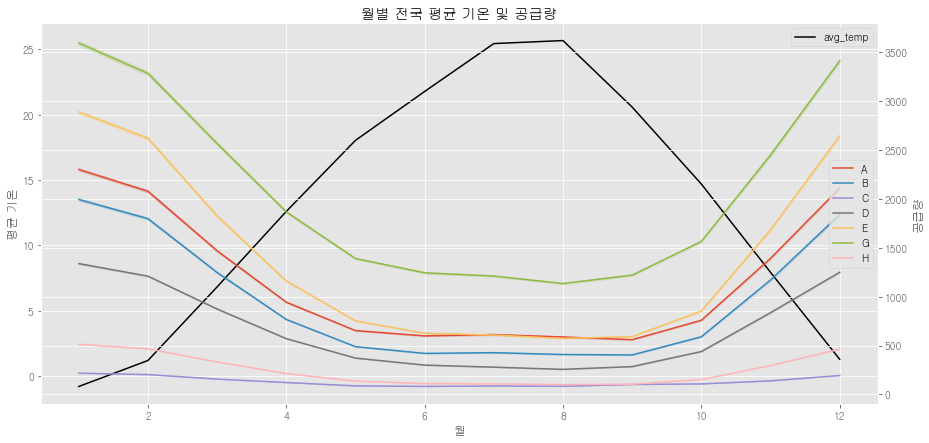

In [7]:
# 월별 전국 평균 기온 및 공급량
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot()
ax1.plot(temp_month, color='k', label='avg_temp')
ax1.set_xlabel('월')
ax1.set_ylabel('평균 기온')
ax1.set_title('월별 전국 평균 기온 및 공급량')
plt.legend()

ax2 = ax1.twinx()
sns.lineplot(data=data, x='month', y='공급량', hue='구분')
plt.legend(loc='center right')
plt.savefig('result/avg_temp_month.png')
plt.show()

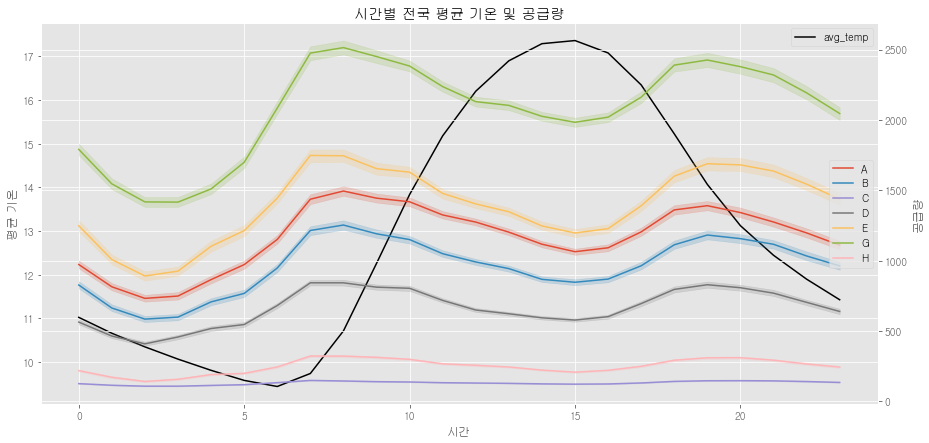

In [8]:
# 월별 전국 평균 기온 및 공급량
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot()
ax1.plot(temp_hour, color='k', label='avg_temp')
ax1.set_xlabel('시간')
ax1.set_ylabel('평균 기온')
ax1.set_title('시간별 전국 평균 기온 및 공급량')
plt.legend()

ax2 = ax1.twinx()
sns.lineplot(data=data, x='시간', y='공급량', hue='구분')
plt.legend(loc='center right')
plt.savefig('result/avg_temp_hour.png')
plt.show()

# humidity

In [9]:
data['연월일'] = pd.to_datetime(data['연월일'])

data['year'] = data['연월일'].dt.year
data['month'] = data['연월일'].dt.month
data['day'] = data['연월일'].dt.day

data['시간'] = data['시간'] - 1

In [10]:
humidity['time'] = pd.to_datetime(humidity['time'])

humidity['year'] = humidity['time'].dt.year
humidity['month'] = humidity['time'].dt.month
humidity['day'] = humidity['time'].dt.day
humidity['hour'] = humidity['time'].dt.hour

In [11]:
humidity_month = humidity.loc[:, ['humidity', 'month']].groupby(by='month').mean()
humidity_hour = humidity.loc[:, ['humidity', 'hour']].groupby(by='hour').mean()

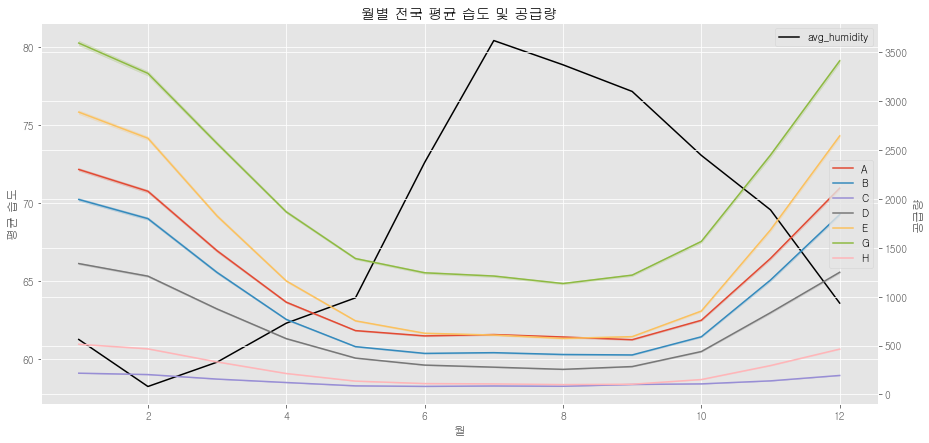

In [12]:
# 월별 전국 평균 습도 및 공급량
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot()
ax1.plot(humidity_month, color='k', label='avg_humidity')
ax1.set_xlabel('월')
ax1.set_ylabel('평균 습도')
ax1.set_title('월별 전국 평균 습도 및 공급량')
plt.legend()

ax2 = ax1.twinx()
sns.lineplot(data=data, x='month', y='공급량', hue='구분')
plt.legend(loc='center right')
plt.savefig('result/avg_humidity_month.png')
plt.show()

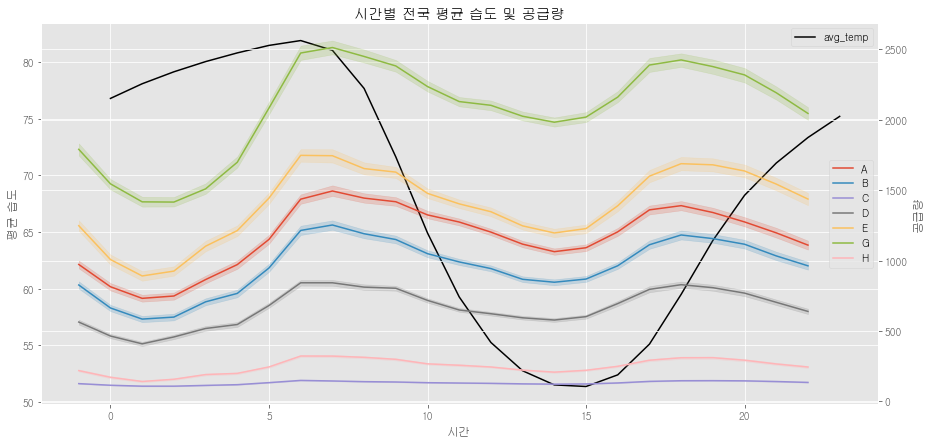

In [13]:
# 시간별 전국 평균 습도 및 공급량
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot()
ax1.plot(humidity_hour, color='k', label='avg_temp')
ax1.set_xlabel('시간')
ax1.set_ylabel('평균 습도')
ax1.set_title('시간별 전국 평균 습도 및 공급량')
plt.legend()

ax2 = ax1.twinx()
sns.lineplot(data=data, x='시간', y='공급량', hue='구분')
plt.legend(loc='center right')
plt.savefig('result/avg_humidity_hour.png')
plt.show()

# holiday

In [14]:
holiday['추정치'] = holiday['추정치'].apply(lambda x: x + 1 if x < 0 else x)

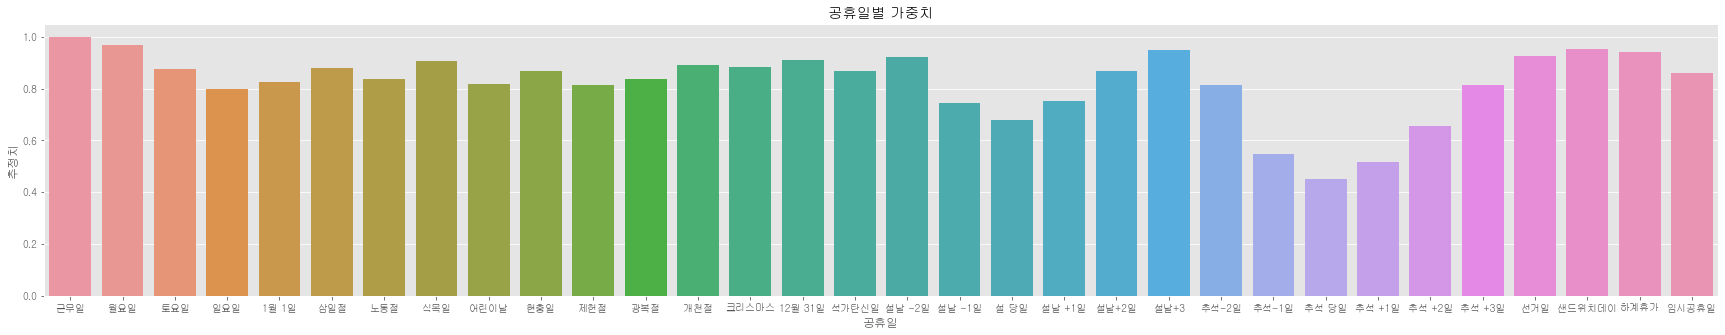

In [15]:
# 특수일별 가중치
plt.figure(figsize=(30, 5))
sns.barplot(data=holiday, x='특수일', y='추정치')
plt.title('공휴일별 가중치')
plt.xlabel('공휴일')
plt.savefig('result/weights.png')
plt.show()

# day of week

In [16]:
data['연월일'] = pd.to_datetime(data['연월일'])
data['요일'] = data['연월일'].dt.day_of_week

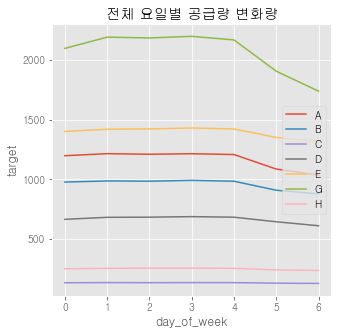

In [17]:
day_of_week = data.groupby(by=['구분', '요일']).mean()['공급량'].reset_index()

plt.figure(figsize=(5, 5))
for i, sep in enumerate(day_of_week['구분'].unique()):
    line = day_of_week.iloc[i * 7:i * 7 + 7, :]
    sns.lineplot(data=line, x='요일', y='공급량', label=sep)
    
plt.title('전체 요일별 공급량 변화량')
plt.xlabel('day_of_week')
plt.ylabel('target')
plt.legend(loc='center right')
plt.savefig('result/day_of_week.png')
plt.show()

# outlier

In [18]:
data.head()

,연월일,시간,구분,공급량,year,month,day,요일
0,2013-01-01,-1,A,2497.129,2013,1,1,1
1,2013-01-01,0,A,2363.265,2013,1,1,1
2,2013-01-01,1,A,2258.505,2013,1,1,1
3,2013-01-01,2,A,2243.969,2013,1,1,1
4,2013-01-01,3,A,2344.105,2013,1,1,1


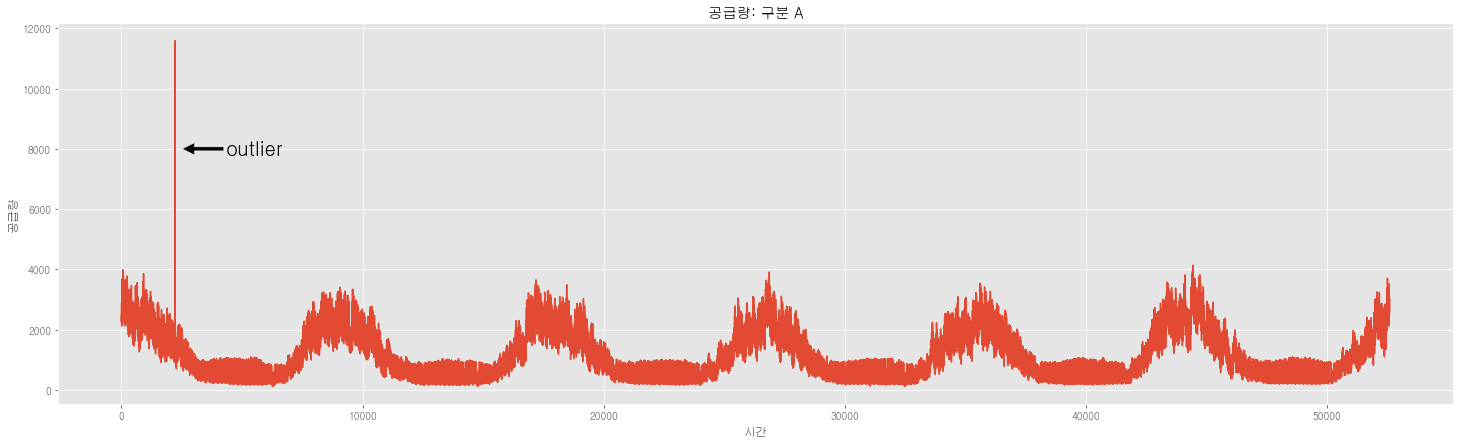

In [19]:
# 공급량 이상치: 구분 A
sample = data[data['구분'] == 'A'].reset_index()

plt.figure(figsize=(25, 7))
plt.plot(sample['공급량'])
plt.title('공급량: 구분 A')
plt.xlabel('시간')
plt.ylabel('공급량')
plt.annotate(text='outlier', fontsize=20, 
             xy=(2530, 8000), xytext=(4330, 7800),         
             arrowprops={'facecolor': 'k'})
plt.savefig('result/outlier_sample.png')
plt.show()

# 2019

In [20]:
pred_2019 = pred_2019[['연월일_x', 'time', 'kind_of_gas', '공급량']]
pred_2019.columns = ['연월일', '시간', '구분', '공급량']
pred_2019['연월일'] = pred_2019['연월일'].apply(lambda x: x.split()[0])

In [21]:
pred_2019['구분'] = pred_2019['구분'].apply(trans_sep)

In [22]:
total_supply = pd.concat(objs=[data, pred_2019], axis=0).reset_index(drop=True)

total_supply['연월일'] = pd.to_datetime(total_supply['연월일'])
total_supply['year'] = total_supply['연월일'].dt.year

total_supply['시간'] = total_supply['시간'].apply(lambda x: int(x) -1)

In [23]:
idx1 = total_supply[total_supply['연월일'] == '2018-12-31'].index[-1]
idx2 = total_supply[total_supply['연월일'] == '2018-01-01'].index[0]

without_pred = total_supply.iloc[:idx1, :]
pred = total_supply.iloc[idx2:, :]

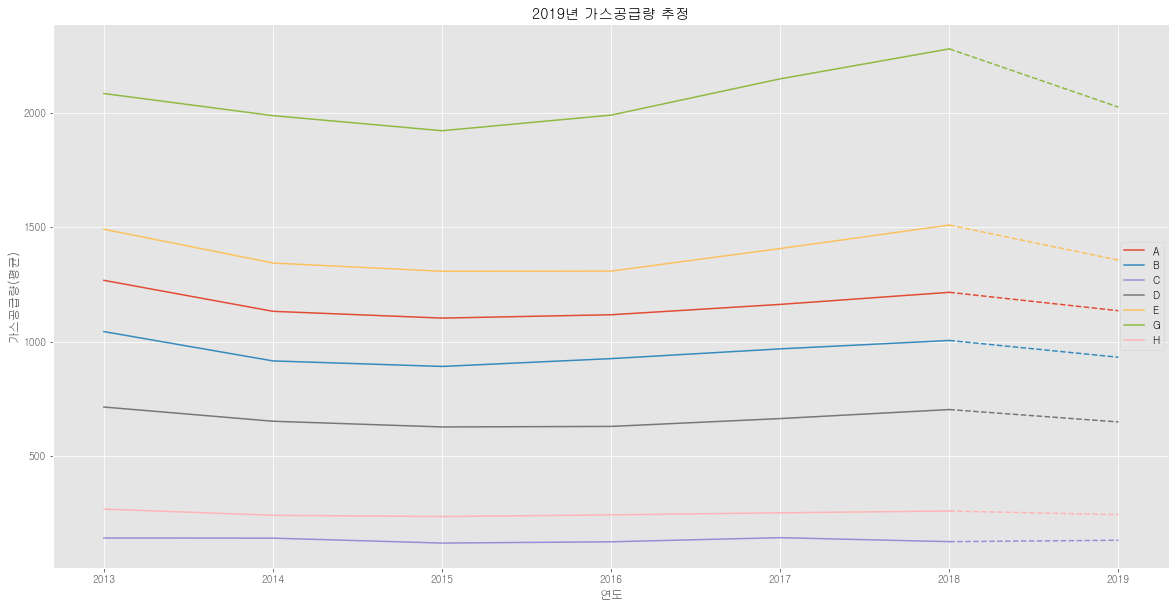

In [24]:
plt.figure(figsize=(20, 10))

for i in without_pred['구분'].unique():
    supply = without_pred[without_pred['구분'] == i]
    plt.plot(supply.groupby(by='year').mean()['공급량'], label=i)
    
for i in pred['구분'].unique():
    supply = pred[pred['구분'] == i]
    plt.plot(supply.groupby(by='year').mean()['공급량'], linestyle='--')

plt.title('2019년 가스공급량 추정')
plt.xlabel('연도')
plt.ylabel('가스공급량(평균)')
plt.legend(loc='center right')
plt.savefig('result/pred_2019.png')
plt.show()

# error

In [25]:
error = pd.DataFrame(data={'model': ['model_1', 'model_2', 'model_3', 'model_4'], 
                          'error': [0.0965484632, 0.076514624, 0.076511387, 0.0659435816]})

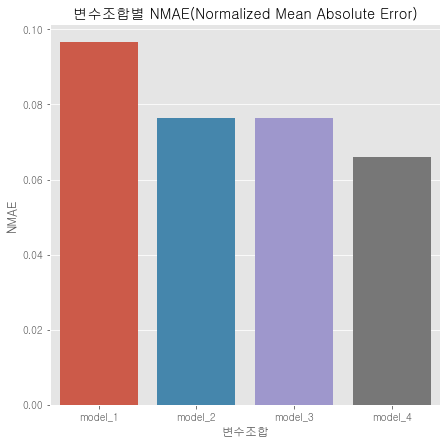

In [26]:
plt.figure(figsize=(7, 7))
sns.barplot(data=error, x='model', y='error')
plt.title('변수조합별 NMAE(Normalized Mean Absolute Error)')
plt.xlabel('변수조합')
plt.ylabel('NMAE')
plt.savefig('result/nmae.png')
plt.show()